# Pandas - create data frames from dictionaries and manipulate

In [2]:
# Pre-defined lists
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
dr =  [True, False, False, False, True, True, True]
cpc = [809, 731, 588, 18, 200, 70, 45]
# Import pandas as pd
import pandas as pd

# Create dictionary my_dict with three key:value pairs: my_dict
my_dict = {'country': names, 'drives_right': dr, 'cars_per_cap': cpc}

# Build a DataFrame cars from my_dict: cars
cars = pd.DataFrame(my_dict)

# Definition of row_labels
row_labels = ['US', 'AUS', 'JAP', 'IN', 'RU', 'MOR', 'EG']

# Specify row labels of cars
cars.index = row_labels

print(cars)

           country  drives_right  cars_per_cap
US   United States          True           809
AUS      Australia         False           731
JAP          Japan         False           588
IN           India         False            18
RU          Russia          True           200
MOR        Morocco          True            70
EG           Egypt          True            45


# Pandas - Part 2
Manipulate data frames

In [13]:
# Import cars data
cars = pd.read_csv('data/cars.csv', index_col = 0)

# Print out country column as Pandas Series
print(cars['country'])
# Print out country column as Pandas DataFrame
print(cars[['country']])
# Print out DataFrame with country and drives_right columns
print(cars[['country', 'drives_right']])
# Print out first 3 observations
print(cars[0:3])
# Print out fourth, fifth and sixth observation
print(cars[3:6])

# Print out observation for Japan using iloc, that only works in index numbers of rows
print(cars.iloc[2])
# Print out observations for Australia and Egypt using loc, that works in row label names
print(cars.loc[['AUS','EG']])
# Print out drives_right value of Morocco
print(cars.loc[['MOR'],'drives_right'])
# Print sub-DataFrame of russia and morroco with columns country and drives_right
print(cars.loc[['RU','MOR'],['country','drives_right']])
# Print out drives_right column as Series
print(cars.loc[:,'drives_right'])
# Print out drives_right column as DataFrame with all rows in dataframe
print(cars.loc[:,['drives_right']])
# Print out cars_per_cap and drives_right as DataFrame
print(cars.loc[:,['cars_per_cap','drives_right']])


US     United States
AUS        Australia
JAP            Japan
IN             India
RU            Russia
MOR          Morocco
EG             Egypt
Name: country, dtype: object
           country
US   United States
AUS      Australia
JAP          Japan
IN           India
RU          Russia
MOR        Morocco
EG           Egypt
           country  drives_right
US   United States          True
AUS      Australia         False
JAP          Japan         False
IN           India         False
RU          Russia          True
MOR        Morocco          True
EG           Egypt          True
     cars_per_cap        country  drives_right
US            809  United States          True
AUS           731      Australia         False
JAP           588          Japan         False
     cars_per_cap  country  drives_right
IN             18    India         False
RU            200   Russia          True
MOR            70  Morocco          True
cars_per_cap      588
country         Japan
drives_right

# Matplotlib
Data Visualization is a key skill for aspiring data scientists. Matplotlib makes it easy to create meaningful and insightful plots. In this chapter, you will learn to build various types of plots and to customize them to make them more visually appealing and interpretable.

     cars_per_cap        country  drives_right
US            809  United States          True
AUS           731      Australia         False
JAP           588          Japan         False
IN             18          India         False
RU            200         Russia          True
MOR            70        Morocco          True
EG             45          Egypt          True
BASIC PLOTS


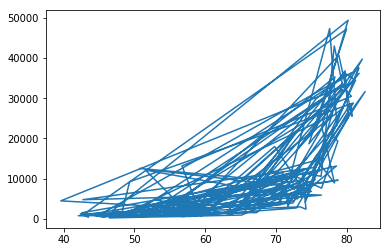

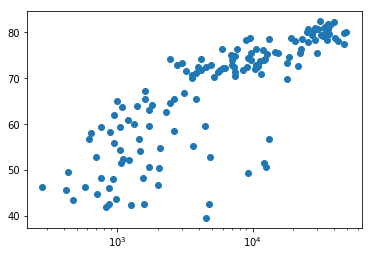

HISTOGRAMS


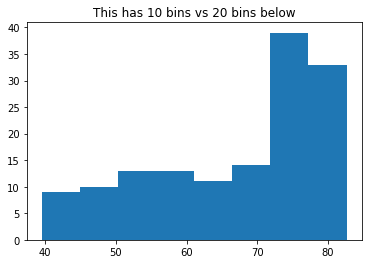

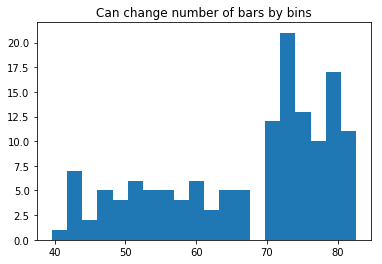

<function matplotlib.pyplot.clf()>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# index_col = 0 gives the column 0 to turn into row labels instead, now you can call row labels
cars = pd.read_csv('data/cars.csv', index_col = 0)
brics = pd.read_csv('data/brics.csv')
g = pd.read_csv('data/gapminder.csv')

print(cars)
print("BASIC PLOTS")
#Basic plot
plt.plot( g.life_exp, g.gdp_cap)
plt.show()
plt.clf

# Scatter plot
plt.scatter(g.gdp_cap, g.life_exp)
# Put the x-axis on a logarithmic scale
plt.xscale('log')
# Show plot
plt.show()
plt.clf

print("HISTOGRAMS")
plt.hist(g.life_exp, bins=8)
plt.title("This has 10 bins vs 20 bins below")
plt.show()
plt.clf
plt.hist(g.life_exp, bins=20)
plt.title("Can change number of bars by bins")
plt.show()
plt.clf

# Customise Matplots

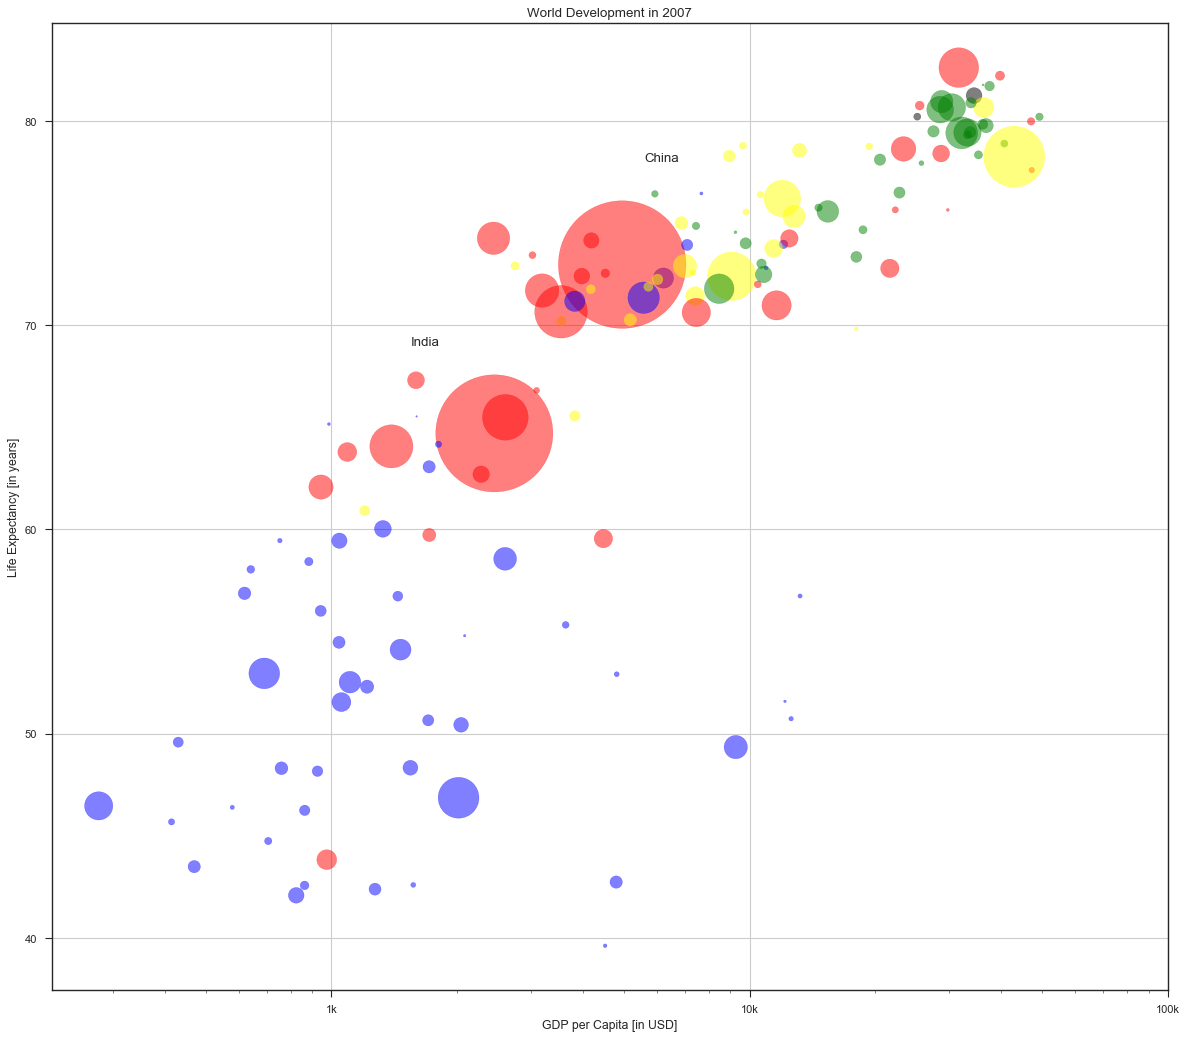

In [91]:
# This changes the size of the plots
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

# Creating a colors list to add to the scatter plot as c
c_dict = {
    'Asia':'red',
    'Europe':'green',
    'Africa':'blue',
    'Americas':'yellow',
    'Oceania':'black'
}
continents = np.array(g.cont)
#The below function converts continents in the continents list and returns the value of the continent key in the c_dict
continents = np.vectorize(c_dict.get)(continents) #Now you have a list of colours per continent


# Specify c and alpha inside plt.scatter(), alpha = contrast of colours, s = size of plots
plt.scatter(x = g.gdp_cap, y = g.life_exp, s = g.population/100000, c = continents, alpha=0.5)
# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')
## Adapt the ticks on the x-axis, converts to 1000's = / 1000, and calls it k instead
plt.xticks([1000,10000,100000], ['1k','10k','100k'])

# Additional customizations
# print(g[g.country == "China"])
# print(g[g.country == "India"])
plt.text(1550, 69, 'India') #1550 and 65 are just coordinates on the plot, you can move it anywhere
plt.text(5600, 78, 'China')

# Addd Grid lines to the plot
plt.grid(True)

# Show the plot
plt.show()




# Seaborn Graphs

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

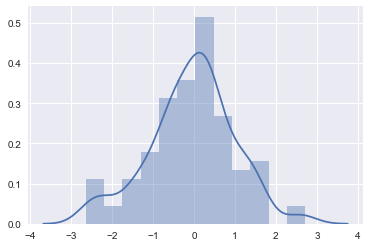

In [92]:
sns.set(color_codes=True)
x = np.random.normal(size=100)
sns.distplot(x);



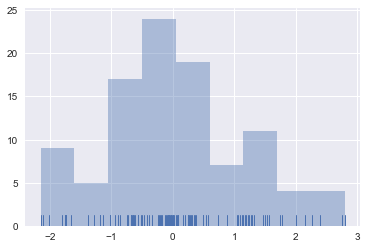

In [66]:
sns.distplot(x, kde=False, rug=True);

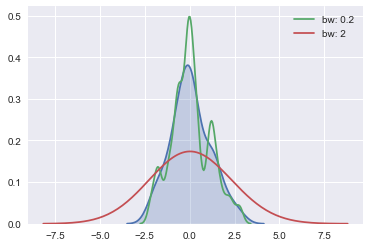

In [77]:
sns.kdeplot(x, shade=True)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

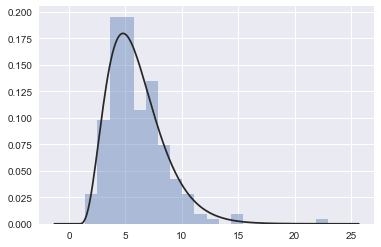

In [78]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

#### Plotting bivariate distributions

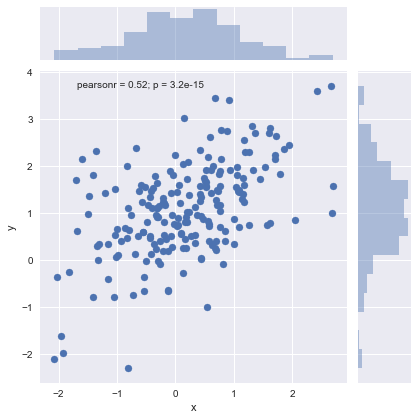

In [80]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df);

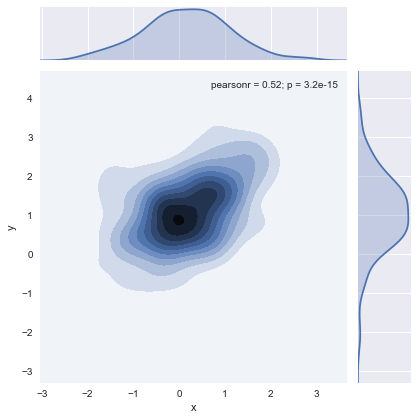

In [81]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

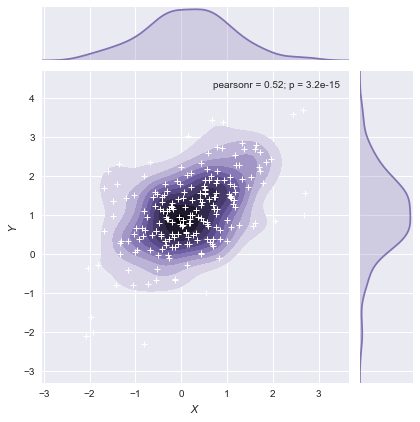

In [82]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

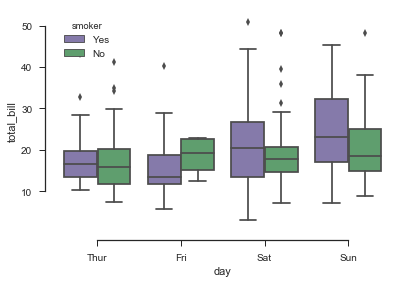

In [94]:
# Boxplot
import seaborn as sns
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

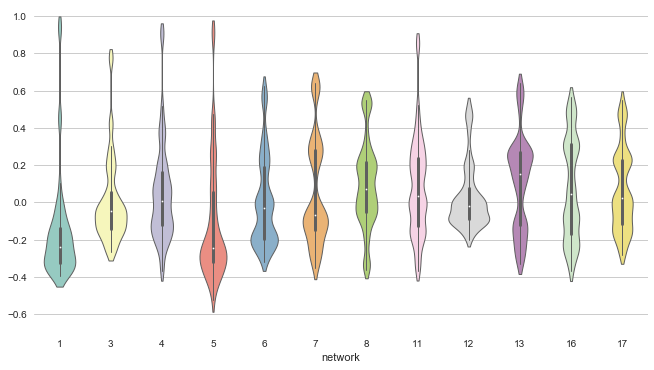

In [106]:
sns.set(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]
# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

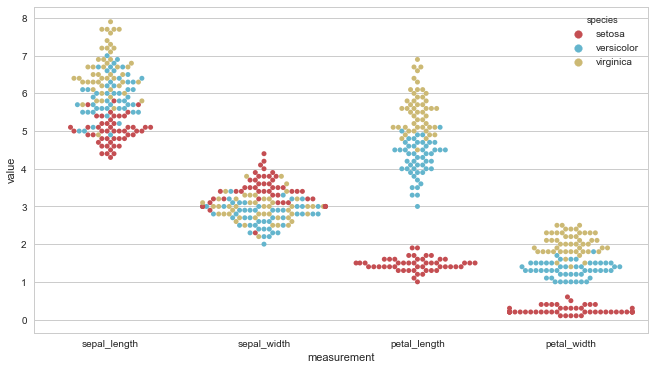

In [113]:
sns.set(style="whitegrid", palette="muted")

# Load the example iris dataset
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Set size of plot
f, ax = plt.subplots(figsize=(11, 6))

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species",
              palette=["r", "c", "y"], data=iris)

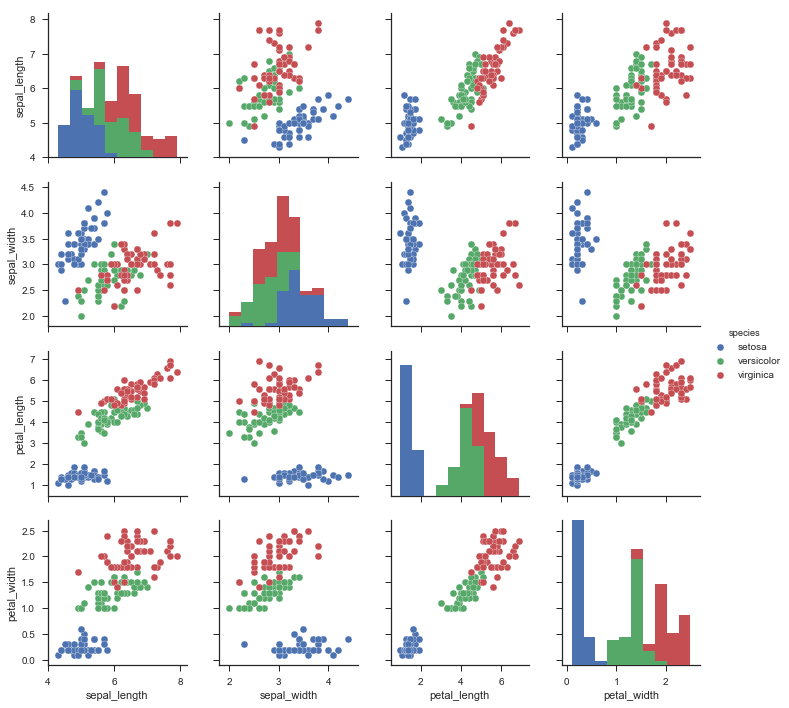

In [114]:
# Pair plot
sns.set(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

# ggplot, Bokeh, Pygal, geoplotlib

In [1]:
#GEOPLOTLIB
import geopandas as gpd
import geoplot as gplt
# Unclutter the display.
import pandas as pd; pd.set_option('max_columns', 6)
# Load and display some example data.
# All of the examples in this notebook use the `quilt` package to do this.
from quilt.data.ResidentMario import geoplot_data

# Only necessary if working in a Jupyter environment.
%matplotlib inline


continental_cities = gpd.read_file(geoplot_data.usa_cities()).query('POP_2010 > 100000')
contiguous_usa = gpd.read_file(geoplot_data.contiguous_usa())
continental_cities.head()

ImportError: dlopen(/anaconda3/lib/python3.6/site-packages/fiona/ogrext.cpython-36m-darwin.so, 2): Library not loaded: @rpath/libkea.1.4.7.dylib
  Referenced from: /anaconda3/lib/libgdal.20.dylib
  Reason: image not found

## Plotting your data (geoplot)
We can easily plot all of these cities on a map using the geoplot pointplot functionality. However, points in space are hard to interpret. To add geospatial context, we'll overlay United States state shapes as well, using the polyplot function.

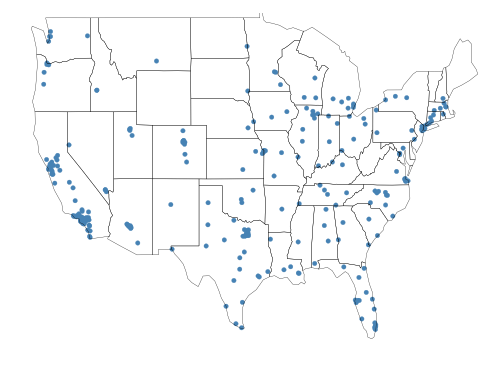

In [124]:
ax = gplt.pointplot(continental_cities)
gplt.polyplot(contiguous_usa, ax=ax)

In [1]:
import matplotlib.pyplot as plt

collisions = gpd.read_file(geoplot_data.nyc_collision_factors())
boroughs = gpd.read_file(geoplot_data.nyc_boroughs())
census_tracts = gpd.read_file(geoplot_data.ny_census_partial())
percent_white = census_tracts['WHITE'] / census_tracts['POP2000']
obesity = geoplot_data.obesity_by_state()
contiguous_usa = gpd.read_file(geoplot_data.contiguous_usa())
contiguous_usa['Obesity Rate'] = contiguous_usa['State'].map(
    lambda state: obesity.query("State == @state").iloc[0]['Percent']
)
la_flights = gpd.read_file(geoplot_data.la_flights())
la_flights = la_flights.assign(
    start=la_flights.geometry.map(lambda mp: mp[0]),
    end=la_flights.geometry.map(lambda mp: mp[1]))

NameError: name 'gpd' is not defined